<a name="0"></a> 

# Time Series Forecasting 

---

## Notebook Outline 

* [1. Exploratory Analysis](#1) 
* [2. Train and Test Data](#2) 
* [3. Time Series Decomposition](#3) 
* [4. SARIMAX Model](#4) 

---

In [1]:
import os 
os.chdir('../../') 

from dspML import data, plot, utils 
from dspML.preprocessing import sequence 

import numpy as np 
import pandas as pd 
import statsmodels.tsa.api as sm 
import matplotlib.pyplot as plt 

plt.rc('figure', figsize=(16, 10)) 
plt.rc('font', size=13) 

# Load Data 

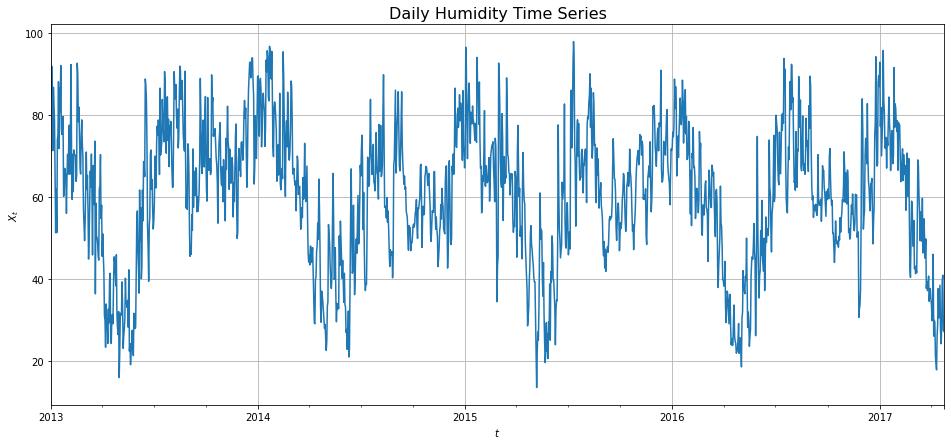

In [2]:
x = data.Climate.humidity() 
plot.signal_pd(
    x, title='Daily Humidity Time Series', figsize=(16, 7)
) 

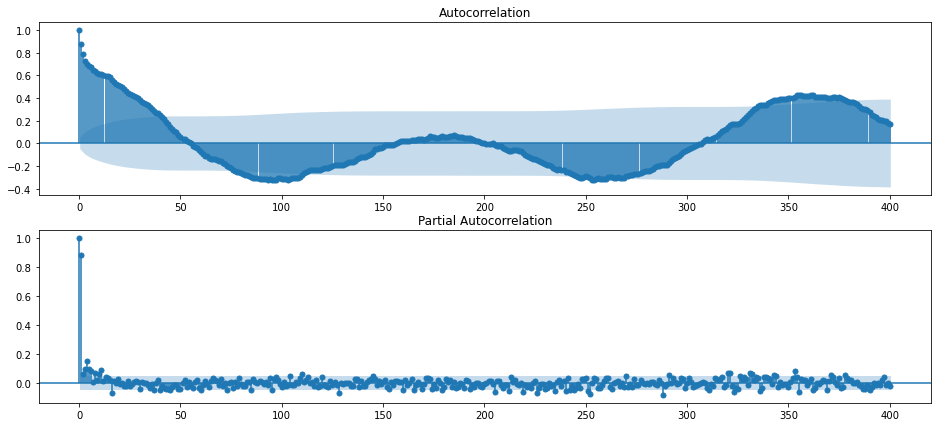

In [3]:
# plot ACF/PACF 
plot.p_acf(
    x, lags=400, figsize=(16, 7)
) 

<a name="1"></a> 

# 1. Exploratory Analysis 

[Outline](#0) 

---

## Section Outline 

* [Weekly Time Series](#1-1) 
* [Monthly Time Series](#1-2) 

---

<a name="1-1"></a> 

## Weekly Time Series 

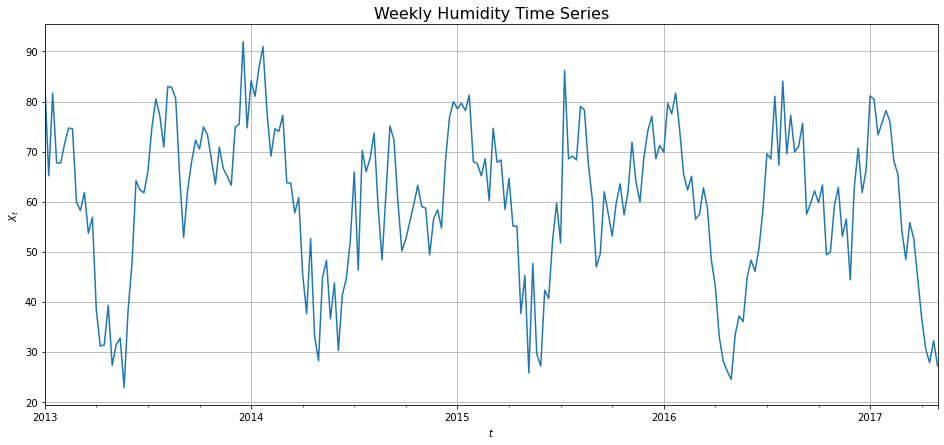

In [4]:
# plot weekly time series 
plot.signal_pd(
    x.resample('W').mean(), 
    title='Weekly Humidity Time Series', 
    figsize=(16, 7)
) 

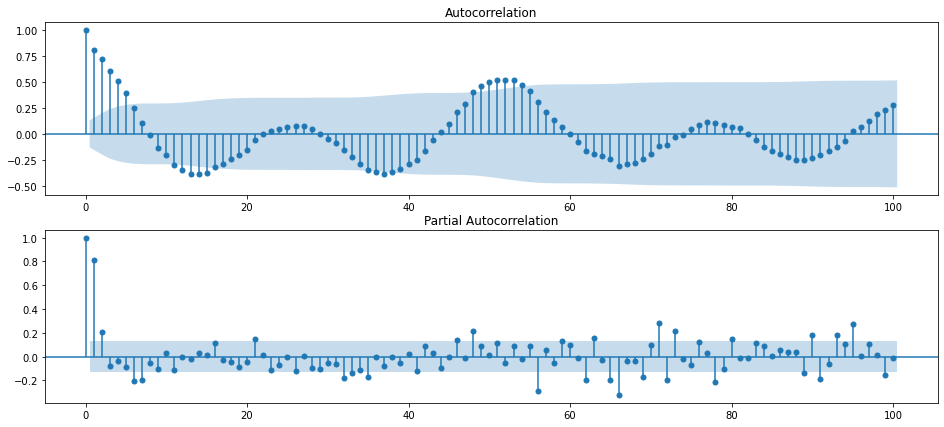

In [6]:
# plot ACF/PACF 
plot.p_acf(
    x.resample('W').mean(), 
    lags=100, 
    figsize=(16, 7)
) 

The weekly data have seem to have significant partial autocorrelations only 2-3 years in the future. 

---

<a name="1-2"></a> 

## Monthly Time Series 

[Section Outline](#1) 

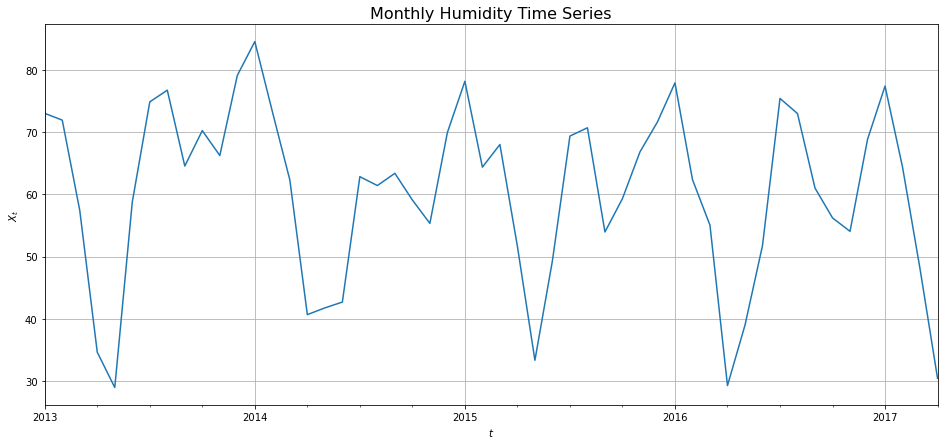

In [7]:
# plot monthly time series 
plot.signal_pd(
    x.resample('M').mean(), 
    title='Monthly Humidity Time Series', 
    figsize=(16, 7)
) 

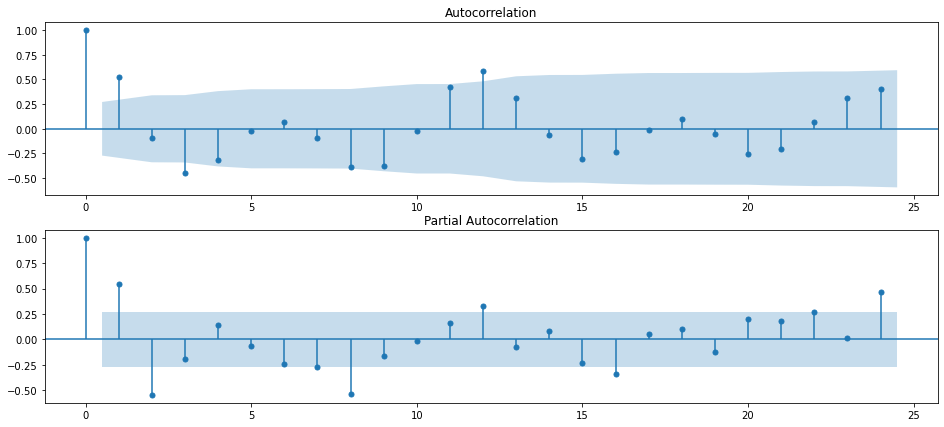

In [9]:
# plot ACF/PACF 
plot.p_acf(
    x.resample('M').mean(), 
    lags=24, 
    figsize=(16, 7) 
) 

<a name="2"></a> 

# 2. Train and Test Data 

[Outline](#0) 

---

In [10]:
# save the month of April for forecasting 
fc_hzn = 24 
x_train, x_test = sequence.temporal_split(x, fc_hzn) 

# ADF test for train data 
utils.ADF_test(x_train) 


Augmented Dickey-Fuller Test:

Test Statistic            -3.826618
p-val                      0.002646
Num. Lags                 15.000000
Num. Observations       1535.000000
Critical Value (1%)       -3.434617
Critical Value (5%)       -2.863425
Critical Value (10%)      -2.567773
dtype: float64

Conclusion:
The p-val <= 0.01 thus, the series is stationary


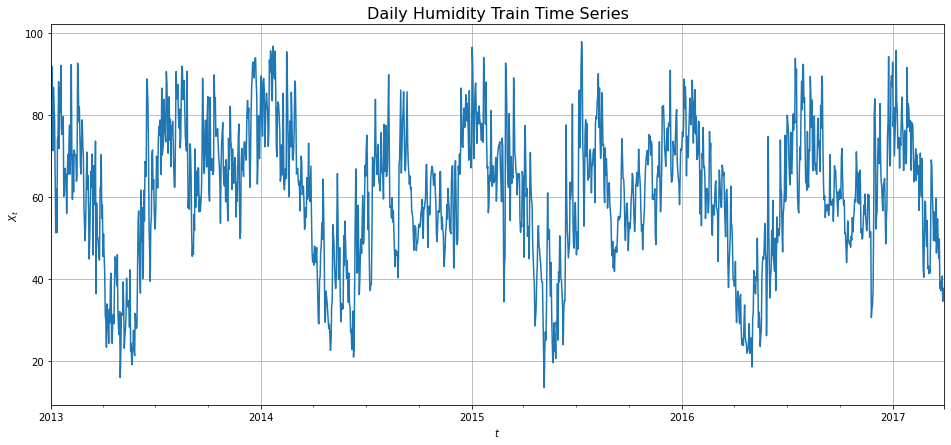

In [11]:
# plot train series 
plot.signal_pd(
    x_train, 
    title='Daily Humidity Train Time Series', 
    figsize=(16, 7)
) 

<a name="3"></a> 

# 3. Time Series Decomposition 

[Outline](#0) 

---


## Decomposition by Moving Averages

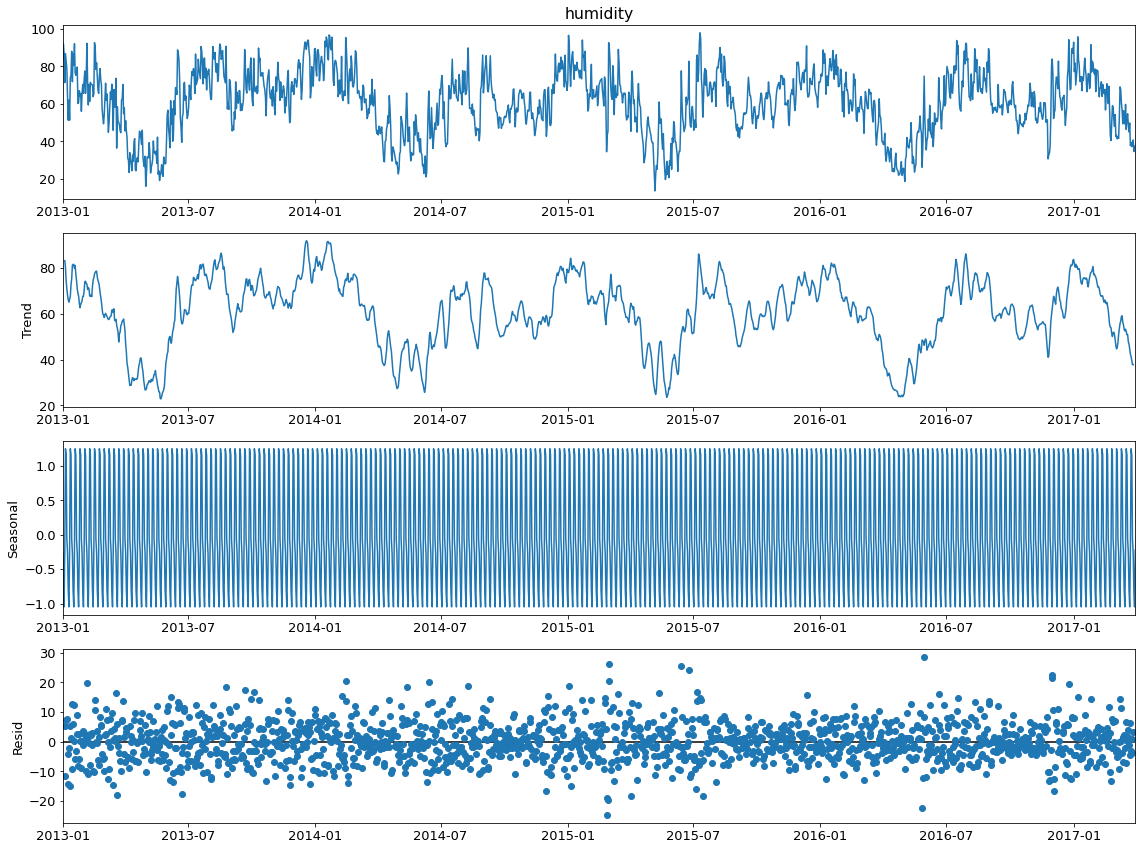

In [19]:
# time series decomposition 
decomp = sm.seasonal_decompose(
    x_train, 
    model='additive'
) 

# extract trend and seasonal components 
trend = decomp.trend 
season = decomp.seasonal 

# plot components 
fig = decomp.plot() 

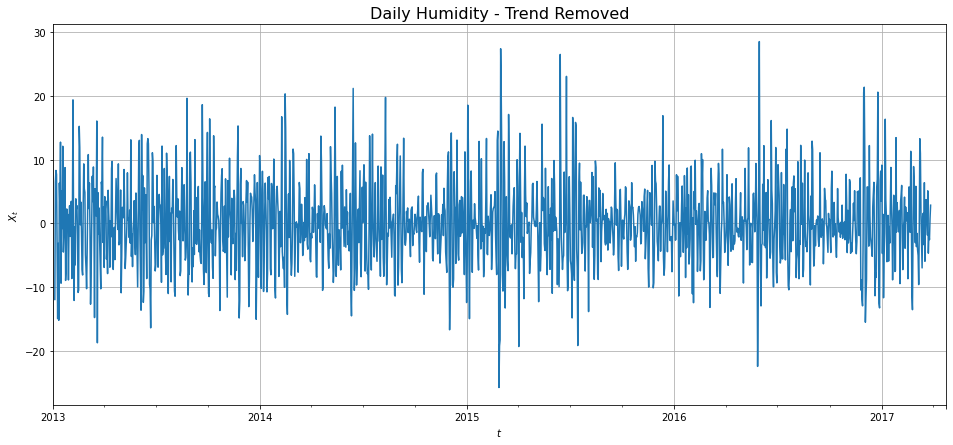

In [13]:
# plot time series with trend removed 
plot.signal_pd(
    x - trend, 
    title='Daily Humidity - Trend Removed', 
    figsize=(16, 7)
) 

The series looks like it could follow a white noise process after trend removal. 

---

<a name="4"></a> 

# 4. SARIMAX Model

[Outline](#0) 